In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [4]:
#importing the data set
df = pd.read_csv('Data_Naive_Bayes.csv')

In [5]:
df.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [7]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [8]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [9]:
le = preprocessing.LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [10]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,5,12.2,11.5,12.2,13.4,2.0904,1.3936
155,5,13.4,11.7,12.4,13.5,2.4300,1.2690
156,5,12.2,12.1,13.0,13.8,2.2770,1.2558
157,5,19.7,13.2,14.3,15.2,2.8728,2.0672


In [11]:
df['Species'].unique()

array([0, 4, 6, 1, 2, 3, 5])

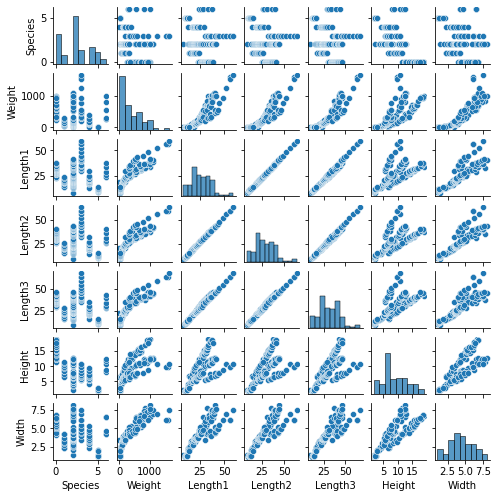

In [12]:
sns.pairplot(df,height=1)

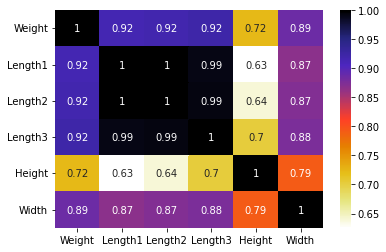

In [13]:
cor = df.iloc[:,1:].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [14]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [15]:
corr_features = correlation(df.iloc[:,1:], 0.9)
len(set(corr_features))

3

In [16]:
corr_features

{'Length1', 'Length2', 'Length3'}

In [17]:
df.drop(columns=['Length1','Length2'],axis=1,inplace = True)

In [18]:
df

,Species,Weight,Length3,Height,Width
0,0,242.0,30.0,11.5200,4.0200
1,0,290.0,31.2,12.4800,4.3056
2,0,340.0,31.1,12.3778,4.6961
3,0,363.0,33.5,12.7300,4.4555
4,0,430.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,5,12.2,13.4,2.0904,1.3936
155,5,13.4,13.5,2.4300,1.2690
156,5,12.2,13.8,2.2770,1.2558
157,5,19.7,15.2,2.8728,2.0672


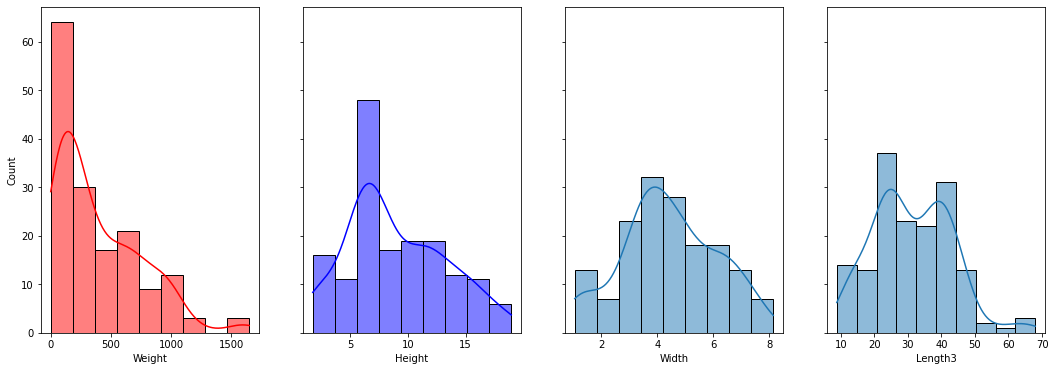

In [30]:
fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharey=True)
sns.histplot(df, ax=axes[0], x="Weight", kde=True, color='r')
sns.histplot(df, ax=axes[1], x="Height", kde=True, color='b')
sns.histplot(df, ax=axes[2], x="Width", kde=True)
sns.histplot(df, ax=axes[3], x="Length3", kde=True)

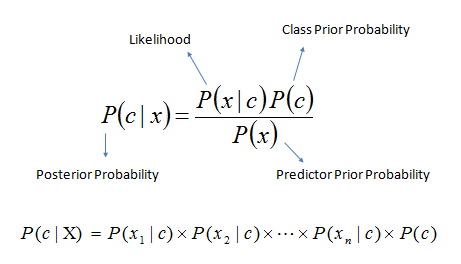

P(c|x) is the posterior probability of class (c, target) given predictor (x, attributes)

P(c) is the prior probability of class.

P(x|c) is the likelihood which is the probability of predictor given class

Bayes’ theorem states the following relationship, given class variable y and feature vector x1 to xn

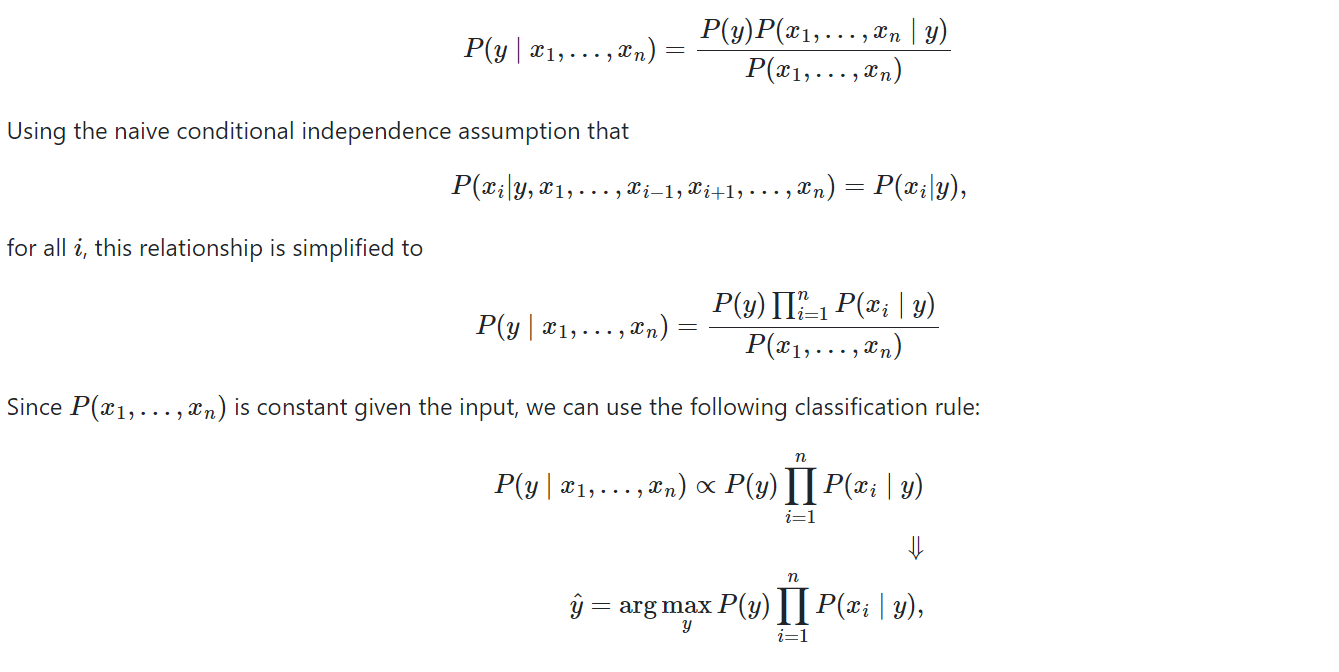

For every value of Y we need to compute teh product of liklihood and prior and retrurn that particular y value for which the product becomes maximum or

# Calculate P(Y=y) for all possible y

In [20]:
#This function returns an array that contains all the prior probabilites
# in our case it will return an array of of 7 elements as we have 7 classes
# we are dividing the no. of samples where y = i by the total number of samples
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

# Calculate P(X=x|Y=y) using Gaussian dist.

The likelihood of the features is assumed to be Gaussian:

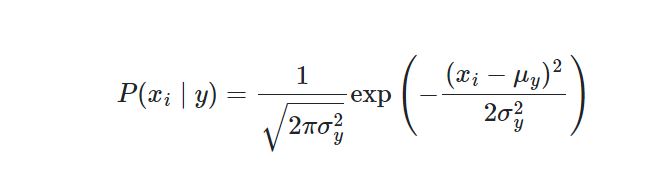

In [21]:
# as our features are continuous, we will fit an approxiate distribution to the features
# so that we can calculate its probability
# it returns a conditional probability x given y 
# we consider the features to be independent
# this function first  extracts all the feature names then it extracts all the data points where 
# the Y value is the given label
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label] # we are taking those data points where the y value is equal the label
    mean, std = df[feat_name].mean(), df[feat_name].std() # mean and std dev. for a particular feature
    # PDF of the normal distribution
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

# Calculate P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y) * P(Y=y) for all y and find the maximum





In [22]:
# we will calculating the posterior probability of all the classes and will return that particular class
# that maximizes the value
def naive_bayes_gaussian(df, X, Y):
    # get feature names
    features = list(df.columns)[1:] #extracting the feature names

    # calculate prior
    prior = calculate_prior(df, Y) # we are calling the prior function to calculate the prior probabilities

    Y_pred = [] # declaring an empty array that will store our prediction
    # loop over all the sample data points
    for x in X:      
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)): # in this loop we are traversing through every class
            for i in range(len(features)): # inside that we are tracersing through every feature
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])
# we are multipying the individual conditional probabilities to get the actual liklihood
        
        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)): #traversing through all the classes and mul. likelihood and prior
            post_prob[j] = likelihood[j] * prior[j]
#we will return that particular class for which the posterior prob. is maximum
        Y_pred.append(np.argmax(post_prob))
# returning the predictions corresponding to our input dataset
    return np.array(Y_pred) 

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
df.head(10)

,Species,Weight,Length3,Height,Width
0,0,242.0,30.0,11.5200,4.0200
1,0,290.0,31.2,12.4800,4.3056
2,0,340.0,31.1,12.3778,4.6961
3,0,363.0,33.5,12.7300,4.4555
4,0,430.0,34.0,12.4440,5.1340
5,0,450.0,34.7,13.6024,4.9274
6,0,500.0,34.5,14.1795,5.2785
7,0,390.0,35.0,12.6700,4.6900
8,0,450.0,35.1,14.0049,4.8438
9,0,500.0,36.2,14.2266,4.9594


# Test Gaussian model

In [25]:
train, test = train_test_split(df, test_size=.2, random_state=100)

In [26]:
X_test = test.iloc[:,1:].values
Y_test = test.iloc[:,0].values
# we compute the model on training data set.
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="Species")

In [27]:
from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))

[[9 1 0 0 0 0]
 [2 3 0 4 0 0]
 [0 1 1 0 0 0]
 [0 1 0 5 0 0]
 [0 0 0 0 4 0]
 [1 0 0 0 0 0]]


In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, Y_pred)*100)

68.75
